In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('bestsellers with categories.csv')
print(data.head())
print(data.shape)

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
(550, 7)


##### Про скільки книг зберігає дані датасет? Відповідь:  550

In [2]:
data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
data.columns

Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')

In [3]:
missing_values = data.isna().sum()
print(missing_values)

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


##### Чи є в якихось змінних пропуски? Відповідь: Ні

In [4]:
unique_genre = data.genre.unique()
unique_genre

array(['Non Fiction', 'Fiction'], dtype=object)

##### Які є унікальні жанри? Відповідь: Non Fiction, Fiction

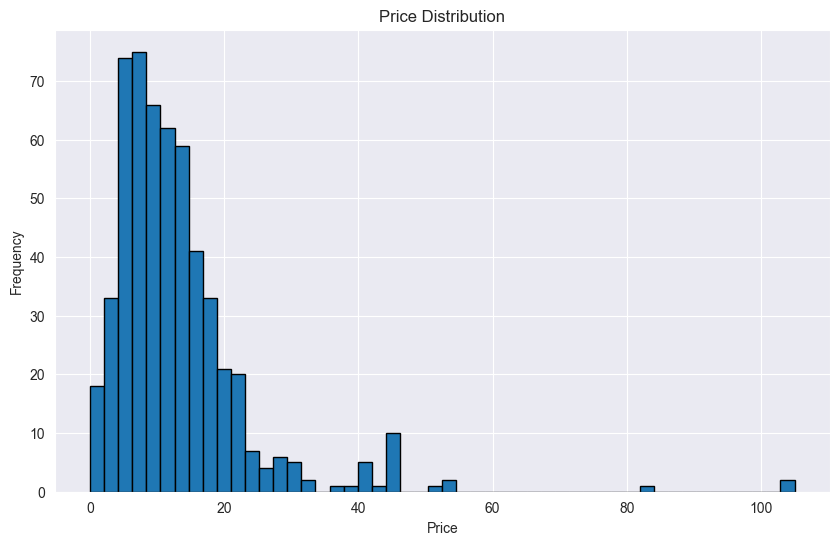

In [5]:
plt.figure(figsize=(10, 6))
data['price'].plot(kind='hist', bins=50, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [6]:
max_price = data.price.max()
min_price = data.price.min()
avg_price = data.price.mean()
mean_price = data.price.mean()
print(max_price)
print(min_price)
print(avg_price)
print(mean_price)

105
0
13.1
13.1


##### Максимальна ціна: 105, Мінімальна ціна: 0, Середня ціна: 13.1,  Медіанна ціна: 13.1

In [7]:
highest_rating = data['user_rating'].max()
num_books_highest_rating = data[data['user_rating'] == highest_rating].shape[0]

highest_rating, num_books_highest_rating

(4.9, 52)

##### Який рейтинг у датасеті найвищий? Відповідь: 4.9
##### Скільки книг мають такий рейтинг? Відповідь: 52

In [8]:
book_most_reviews = data.loc[data['reviews'].idxmax()]
print(book_most_reviews)

name           Where the Crawdads Sing
author                     Delia Owens
user_rating                        4.8
reviews                          87841
price                               15
year                              2019
genre                          Fiction
Name: 534, dtype: object


#####  Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing - 87841 reviews

In [9]:
book_2015 = data[data['year'] == 2015]
most_expensive_book_2015 = book_2015.loc[book_2015['price'].idxmax()]
print(most_expensive_book_2015)

name           Publication Manual of the American Psychologic...
author                        American Psychological Association
user_rating                                                  4.5
reviews                                                     8580
price                                                         46
year                                                        2015
genre                                                Non Fiction
Name: 277, dtype: object


##### З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча ? Відповідь: Publication Manual of the American Psychological Association, 6th Edition - $46

In [10]:
fiction_book_2015 = data[(data['year'] == 2010) & (data['genre'] == 'Fiction')]
count_fiction_book_2015 = fiction_book_2015.shape[0]
print(count_fiction_book_2015)

20


##### Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20

In [11]:
books_high_rating = data[(data['user_rating'] == 4.9) & (data['year'].isin([2010, 2011]))]
count_books_high_rating = books_high_rating.shape[0]
print(count_books_high_rating)

1


##### Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь: 1

In [12]:
filtered_books = data[(data['year'] == 2015) & (data['price'] < 8)]
sorted_book = filtered_books.sort_values(by='price')
last_book = filtered_books.iloc[-1]
print(last_book)

name           To Kill a Mockingbird
author                    Harper Lee
user_rating                      4.8
reviews                        26234
price                              0
year                            2015
genre                        Fiction
Name: 507, dtype: object


##### Яка книга остання у відсортованому списку книг ціною дешевше за $8? Відповідь: Harper Lee - To Kill a Mockingbird

In [13]:
price_by_genre = data.groupby('genre')['price'].agg(['max', 'min'])
print(price_by_genre)

             max  min
genre                
Fiction       82    0
Non Fiction  105    0


##### Максимальна ціна для жанру Fiction: Відповідь - 82
##### Мінімальна ціна для жанру Fiction: Відповідь - 0
##### Максимальна ціна для жанру Non Fiction: Відповідь - 105
##### Мінімальна ціна для жанру Non Fiction: Відповідь - 0

In [14]:
books_per_author = data.groupby('author').agg({'name': 'count'})
print(books_per_author.shape)
author_most_books = books_per_author['name'].idxmax()
max_books = books_per_author['name'].max()
print(author_most_books, '-', max_books)

(248, 1)
Jeff Kinney - 12


##### Якої розмірності вийшла таблиця? Відповідь: 248,1
##### Який автор має найбільше книг? Відповідь: Jeff Kinney
##### Скільки книг цього автора? Відповідь: 12

In [15]:
average_rating_per_author = data.groupby('author').agg({'user_rating': 'mean'}).round(2)

author_min_rating = average_rating_per_author['user_rating'].idxmin()
min_rating = average_rating_per_author['user_rating'].min()
print(author_min_rating,'-', min_rating)

Donna Tartt - 3.9


##### У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
##### Який у цього автора середній рейтинг? Відповідь: 3.9

In [16]:
author_stats = pd.concat([books_per_author, average_rating_per_author], axis=1)
sorted_author_stats  = author_stats.sort_values(by=['name', 'user_rating'])

first_author = sorted_author_stats.index[0]
first_author

'Muriel Barbery'

#####  Який автор перший у списку? Відповідь: Muriel Barbery

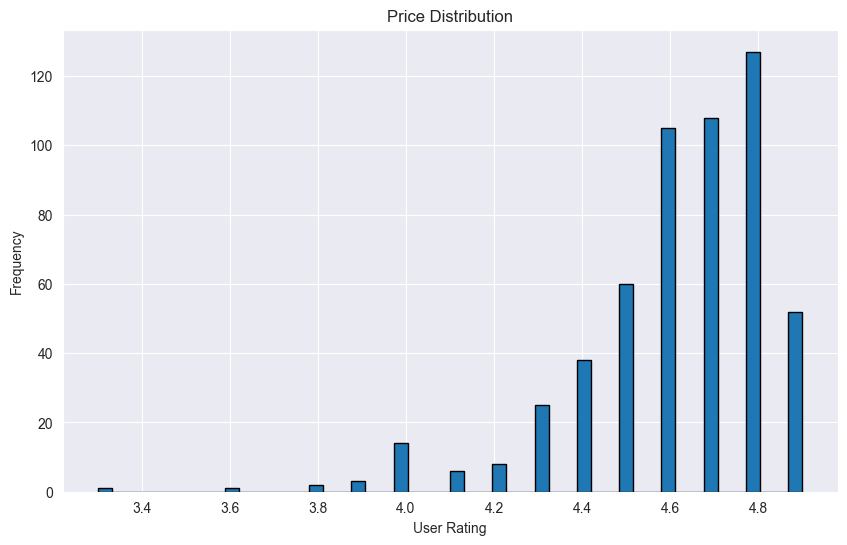

In [17]:
plt.figure(figsize=(10, 6))
data['user_rating'].plot(kind='hist', bins=50, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

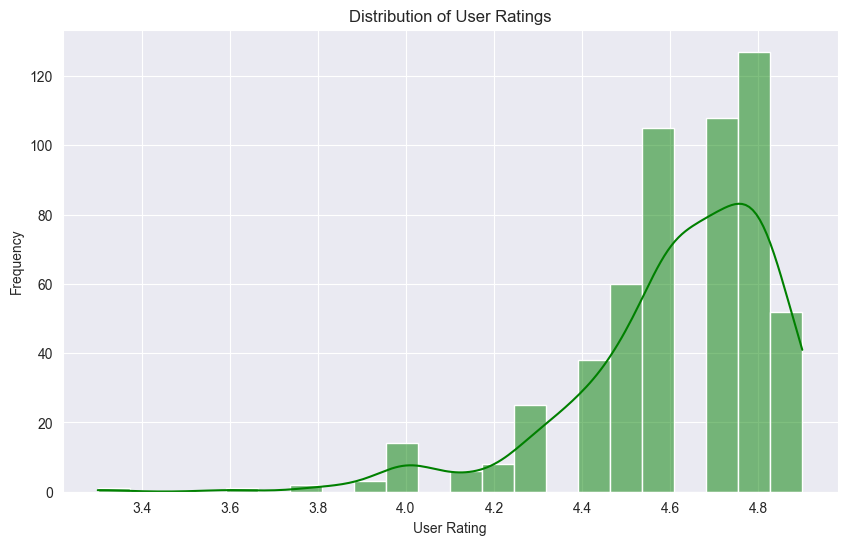

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='user_rating', kde=True, color='green')
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.show()

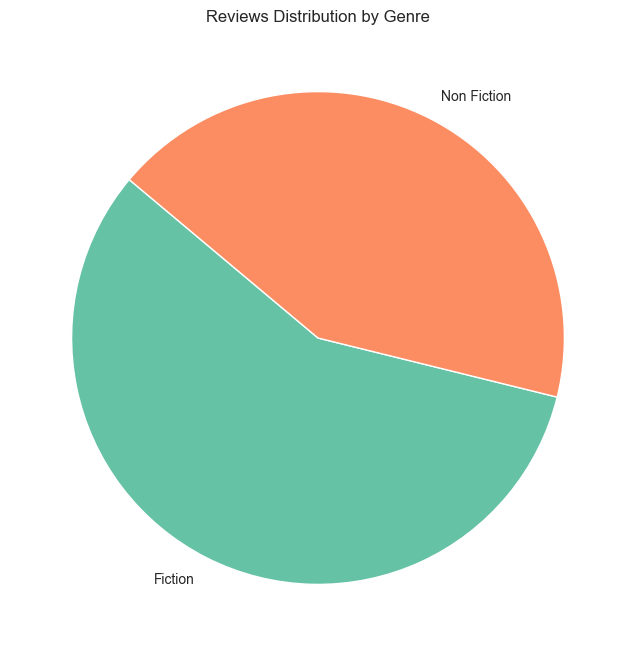

In [19]:
reviews_by_genre = data.groupby('genre')['reviews'].sum()

plt.figure(figsize=(8, 8))
plt.pie(reviews_by_genre, labels=reviews_by_genre.index, startangle=140, colors=sns.color_palette("Set2"))
plt.title('Reviews Distribution by Genre')
plt.show()


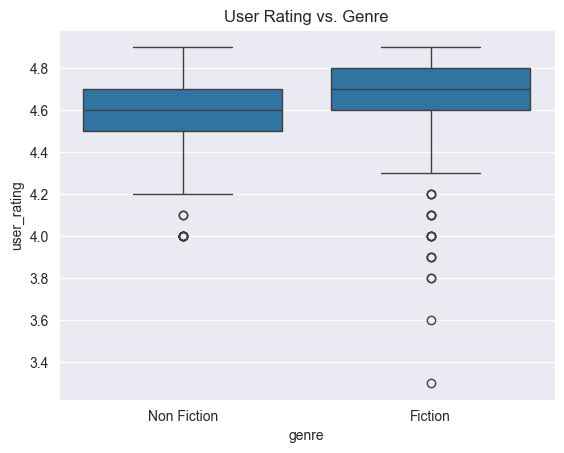

In [20]:
sns.boxplot(x="genre", y="user_rating", data=data)
plt.title('User Rating vs. Genre')
plt.show()

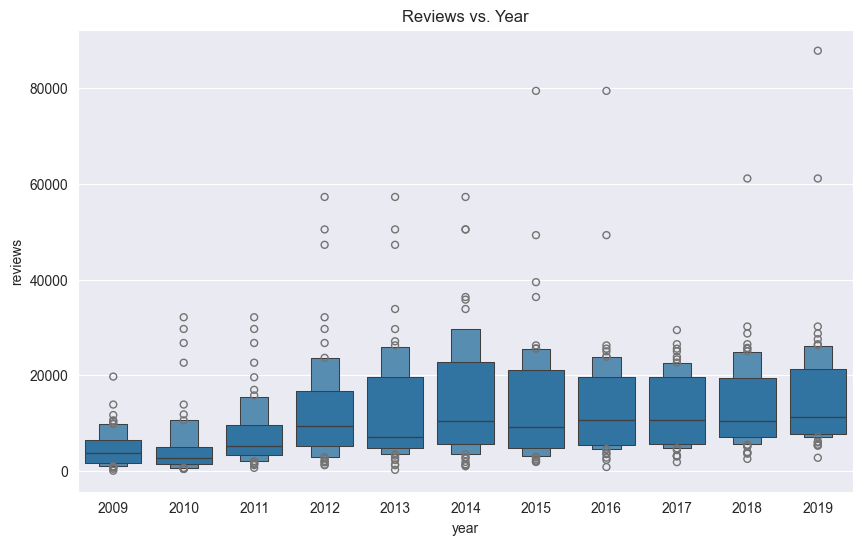

In [21]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x="year", y="reviews", data=data)
plt.title('Reviews vs. Year')
plt.show()

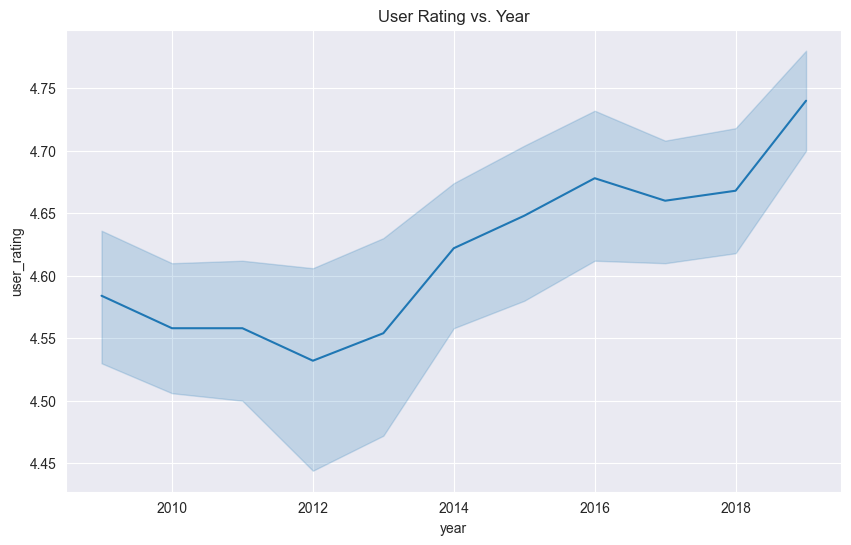

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="year", y="user_rating", data=data)
plt.title('User Rating vs. Year')
plt.show()